In [2]:
import csv
import os
import numpy as np
from tqdm.notebook import tqdm

from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

from Preprocessing.LemmatizerPreprocessor import LemmatizerPreprocessor
from Preprocessing.DataLoader import DataLoader
from LanguageModels.Word2Vec import Word2Vec

import umap

%matplotlib notebook

In [3]:
# load data
data = DataLoader(data_dir = '../data/roastme6k').load(remove_deleted_comments=True)
print(len(data.keys()))

5979


In [4]:
# load pretrained w2v model
dim = 200
w2v = Word2Vec(path='../data/glove.6B/glove.6B.%dd.txt' % dim)

In [5]:
# load preprocessor
lp = LemmatizerPreprocessor()

In [15]:
features = []
labels = []
for k,v in tqdm(data.items()):
    for comment in v['text']:
        vec = w2v.convert(lp.clean(comment))
        
        if vec.ndim == 0 or vec.shape[0] != dim:
            continue
        
        features.append(vec)
        labels.append(list(data.keys()).index(k))
features = np.array(features)
labels = np.array(labels)
print(features.shape)
print(labels.shape)

  0%|          | 0/5979 [00:00<?, ?it/s]

C:\Users\Ryan\Dropbox\CS7643\project\src\LanguageModels\Word2Vec.py:24: RuntimeWarning: Mean of empty slice.
  vec = np.array(vec).mean(axis=0)
C:\Users\Ryan\anaconda3\envs\python3_env\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(58783, 200)
(58783,)


In [9]:
umap2d = umap.UMAP(n_components=2)
X_embedded2d = umap2d.fit_transform(features)
print(X_embedded2d.shape)

umap3d = umap.UMAP(n_components=3)
X_embedded3d = umap3d.fit_transform(features)
print(X_embedded3d.shape)

(58783, 2)
(58783, 3)


<IPython.core.display.Javascript object>


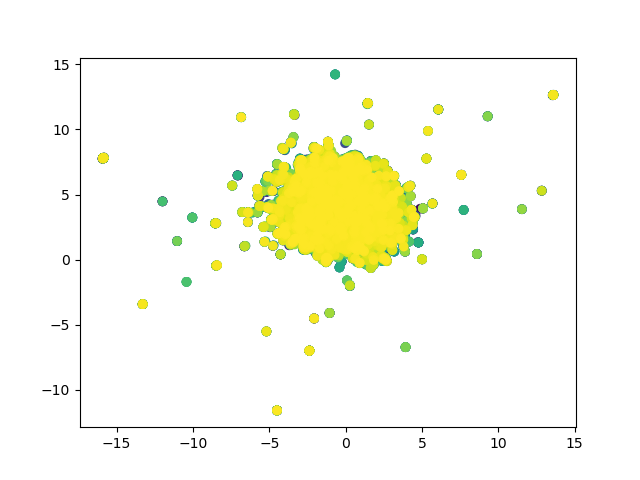

In [16]:
plt.scatter(X_embedded2d[:,0], X_embedded2d[:,1], c=labels)

<IPython.core.display.Javascript object>


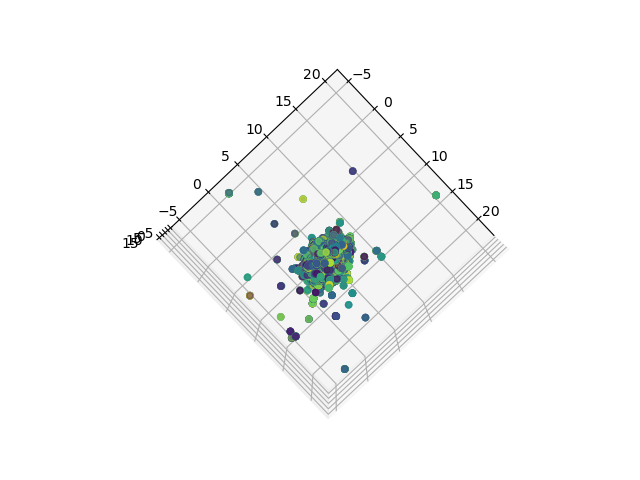

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_embedded3d[:,0], X_embedded3d[:,1], X_embedded3d[:,2], c=labels)

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(features, labels)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
accuracy_score(labels, clf.predict(features))